# VAE Analysis - Faces dataset

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm
import pandas as pd

from models.VAE import VariationalAutoencoder
from utils.loaders import load_model, ImageLabelLoader

In [2]:
# run params
section = 'vae'
run_id = '0001'
data_name = 'faces'
RUN_FOLDER = 'run/{}/'.format(section)
RUN_FOLDER += '_'.join([run_id, data_name])


DATA_FOLDER = './data/celeb/'
IMAGE_FOLDER = './data/celeb/img_align_celeba/'

## data

In [3]:
INPUT_DIM = (128,128,3)

att = pd.read_csv(os.path.join(DATA_FOLDER, 'list_attr_celeba.csv'))

imageLoader = ImageLabelLoader(IMAGE_FOLDER, INPUT_DIM[:2])


In [4]:
imageLoader.image_folder

'./data/celeb/img_align_celeba/'

In [5]:
att.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


## architecture

In [6]:
vae = load_model(VariationalAutoencoder, RUN_FOLDER)

## reconstructing faces

Found 202599 validated image filenames.


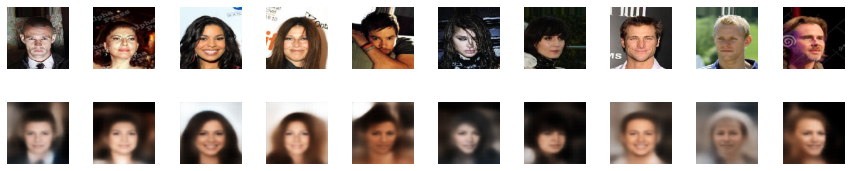

In [7]:
n_to_show = 10

data_flow_generic = imageLoader.build(att, n_to_show)

example_batch = next(data_flow_generic)
example_images = example_batch[0]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')        
    sub.imshow(img)

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img)


In [8]:
data_flow_generic.__getitem__(0)

(array([[[[0.4431373 , 0.48627454, 0.43137258],
          [0.41960788, 0.427451  , 0.38431376],
          [0.61960787, 0.6039216 , 0.5686275 ],
          ...,
          [0.12156864, 0.08235294, 0.07843138],
          [0.1254902 , 0.08627451, 0.08235294],
          [0.1254902 , 0.08627451, 0.08235294]],
 
         [[0.45098042, 0.49411768, 0.43921572],
          [0.40000004, 0.40784317, 0.3647059 ],
          [0.6117647 , 0.59607846, 0.56078434],
          ...,
          [0.12156864, 0.08235294, 0.07843138],
          [0.1254902 , 0.08627451, 0.08235294],
          [0.1254902 , 0.08627451, 0.08235294]],
 
         [[0.4666667 , 0.50980395, 0.454902  ],
          [0.3647059 , 0.37254903, 0.32941177],
          [0.6       , 0.58431375, 0.54901963],
          ...,
          [0.12156864, 0.08235294, 0.07843138],
          [0.1254902 , 0.08627451, 0.08235294],
          [0.12941177, 0.09019608, 0.08627451]],
 
         ...,
 
         [[0.0627451 , 0.05882353, 0.0509804 ],
          [0.06274

## Latent space distribution

20/20 [==============================] - 0s 12ms/step


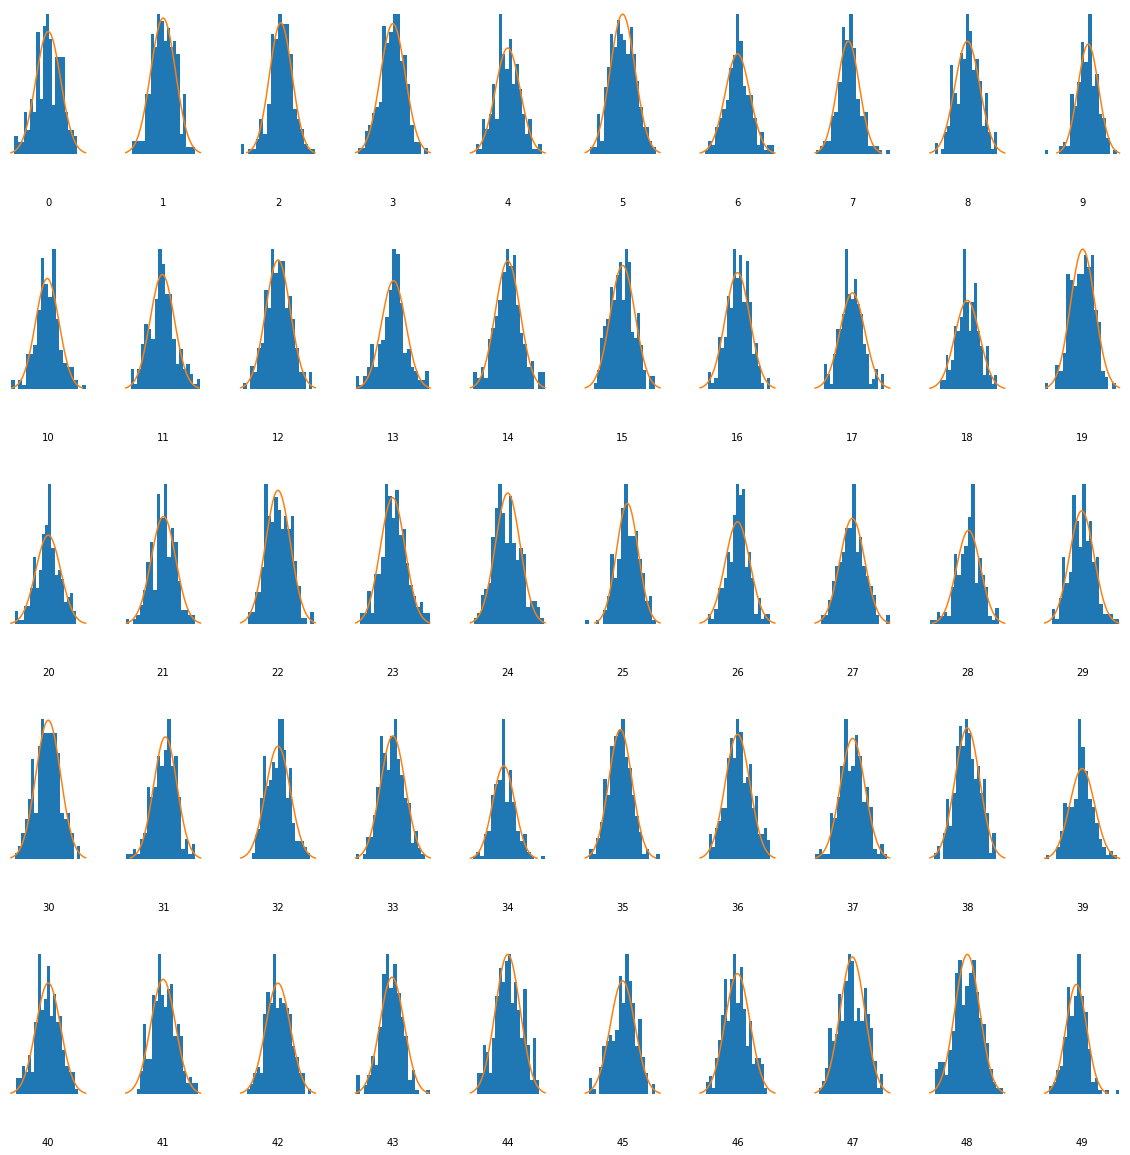

In [9]:
z_test = vae.encoder.predict(data_flow_generic, steps = 20, verbose = 1)

x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(50):
    ax = fig.add_subplot(5, 10, i+1)
    ax.hist(z_test[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()

### Newly generated faces

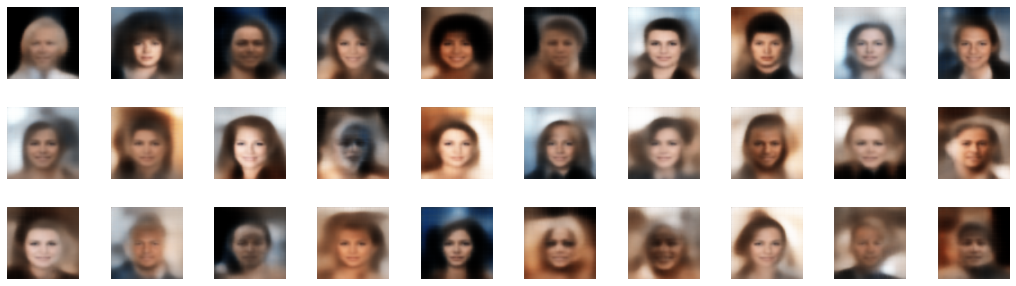

In [10]:
n_to_show = 30

znew = np.random.normal(size = (n_to_show,vae.z_dim))

reconst = vae.decoder.predict(np.array(znew))

fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    ax = fig.add_subplot(3, 10, i+1)
    ax.imshow(reconst[i, :,:,:])
    ax.axis('off')

plt.show()

In [11]:
def get_vector_from_label(label, batch_size):

    data_flow_label = imageLoader.build(att, batch_size, label = label)

    origin = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_sum_POS = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_n_POS = 0
    current_mean_POS = np.zeros(shape = vae.z_dim, dtype = 'float32')

    current_sum_NEG = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_n_NEG = 0
    current_mean_NEG = np.zeros(shape = vae.z_dim, dtype = 'float32')

    current_vector = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_dist = 0

    print('label: ' + label)
    print('images : POS move : NEG move :distance : 𝛥 distance')
    while(current_n_POS < 10000):

        batch = next(data_flow_label)
        im = batch[0]
        attribute = batch[1]

        z = vae.encoder.predict(np.array(im))

        z_POS = z[attribute==1]
        z_NEG = z[attribute==-1]

        if len(z_POS) > 0:
            current_sum_POS = current_sum_POS + np.sum(z_POS, axis = 0)
            current_n_POS += len(z_POS)
            new_mean_POS = current_sum_POS / current_n_POS
            movement_POS = np.linalg.norm(new_mean_POS-current_mean_POS)

        if len(z_NEG) > 0: 
            current_sum_NEG = current_sum_NEG + np.sum(z_NEG, axis = 0)
            current_n_NEG += len(z_NEG)
            new_mean_NEG = current_sum_NEG / current_n_NEG
            movement_NEG = np.linalg.norm(new_mean_NEG-current_mean_NEG)

        current_vector = new_mean_POS-new_mean_NEG
        new_dist = np.linalg.norm(current_vector)
        dist_change = new_dist - current_dist


        print(str(current_n_POS)
              + '    : ' + str(np.round(movement_POS,3))
              + '    : ' + str(np.round(movement_NEG,3))
              + '    : ' + str(np.round(new_dist,3))
              + '    : ' + str(np.round(dist_change,3))
             )

        current_mean_POS = np.copy(new_mean_POS)
        current_mean_NEG = np.copy(new_mean_NEG)
        current_dist = np.copy(new_dist)

        if np.sum([movement_POS, movement_NEG]) < 0.08:
            current_vector = current_vector / current_dist
            print('Found the ' + label + ' vector')
            break

    return current_vector   


In [12]:
def add_vector_to_images(feature_vec):

    n_to_show = 5
    factors = [-4,-3,-2,-1,0,1,2,3,4]

    example_batch = next(data_flow_generic)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    z_points = vae.encoder.predict(example_images)

    fig = plt.figure(figsize=(18, 10))

    counter = 1

    for i in range(n_to_show):

        img = example_images[i].squeeze()
        sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
        sub.axis('off')        
        sub.imshow(img)

        counter += 1

        for factor in factors:

            changed_z_point = z_points[i] + feature_vec * factor
            changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

            img = changed_image.squeeze()
            sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
            sub.axis('off')
            sub.imshow(img)

            counter += 1

    plt.show()


In [13]:
BATCH_SIZE = 500
attractive_vec = get_vector_from_label('Attractive', BATCH_SIZE)
mouth_open_vec = get_vector_from_label('Mouth_Slightly_Open', BATCH_SIZE)
smiling_vec = get_vector_from_label('Smiling', BATCH_SIZE)
lipstick_vec = get_vector_from_label('Wearing_Lipstick', BATCH_SIZE)
young_vec = get_vector_from_label('High_Cheekbones', BATCH_SIZE)
male_vec = get_vector_from_label('Male', BATCH_SIZE)

Found 202599 validated image filenames.
label: Attractive
images : POS move : NEG move :distance : 𝛥 distance
261    : 1.055    : 0.952    : 1.604    : 1.604
496    : 0.587    : 0.692    : 1.261    : -0.342
769    : 0.395    : 0.304    : 1.144    : -0.118
1023    : 0.255    : 0.238    : 1.112    : -0.032
1277    : 0.172    : 0.214    : 1.097    : -0.015
1532    : 0.149    : 0.16    : 1.065    : -0.032
1787    : 0.131    : 0.136    : 1.054    : -0.011
2050    : 0.12    : 0.113    : 1.053    : -0.001
2309    : 0.105    : 0.098    : 1.046    : -0.007
2545    : 0.094    : 0.098    : 1.029    : -0.017
2808    : 0.079    : 0.084    : 1.022    : -0.007
3065    : 0.074    : 0.077    : 1.015    : -0.007
3326    : 0.069    : 0.076    : 1.008    : -0.007
3582    : 0.068    : 0.069    : 1.006    : -0.002
3841    : 0.065    : 0.057    : 0.991    : -0.014
4112    : 0.059    : 0.056    : 0.984    : -0.008
4376    : 0.052    : 0.055    : 0.983    : -0.001
4645    : 0.053    : 0.047    : 0.981    : -0.

In [14]:
eyeglasses_vec = get_vector_from_label('Eyeglasses', BATCH_SIZE)

Found 202599 validated image filenames.
label: Eyeglasses
images : POS move : NEG move :distance : 𝛥 distance
34    : 2.994    : 0.631    : 3.128    : 3.128
59    : 1.535    : 0.448    : 2.516    : -0.612
90    : 1.044    : 0.292    : 2.243    : -0.273
118    : 0.711    : 0.19    : 2.162    : -0.081
151    : 0.629    : 0.145    : 2.001    : -0.161
179    : 0.432    : 0.121    : 1.96    : -0.04
212    : 0.409    : 0.087    : 1.894    : -0.067
246    : 0.366    : 0.081    : 1.815    : -0.078
271    : 0.265    : 0.074    : 1.836    : 0.021
307    : 0.282    : 0.063    : 1.82    : -0.016
332    : 0.228    : 0.066    : 1.779    : -0.041
370    : 0.253    : 0.057    : 1.773    : -0.006
403    : 0.191    : 0.053    : 1.733    : -0.041
442    : 0.209    : 0.045    : 1.694    : -0.039
477    : 0.185    : 0.043    : 1.684    : -0.01
505    : 0.143    : 0.039    : 1.692    : 0.008
546    : 0.179    : 0.04    : 1.683    : -0.008
582    : 0.142    : 0.037    : 1.677    : -0.006
618    : 0.149    : 

In [15]:
blonde_vec = get_vector_from_label('Blond_Hair', BATCH_SIZE)

Found 202599 validated image filenames.
label: Blond_Hair
images : POS move : NEG move :distance : 𝛥 distance
75    : 2.166    : 0.706    : 2.311    : 2.311
164    : 1.138    : 0.468    : 1.861    : -0.45
249    : 0.678    : 0.284    : 1.759    : -0.102
320    : 0.366    : 0.201    : 1.716    : -0.043
394    : 0.328    : 0.162    : 1.664    : -0.052
456    : 0.254    : 0.12    : 1.629    : -0.035
523    : 0.22    : 0.106    : 1.604    : -0.025
594    : 0.223    : 0.1    : 1.585    : -0.019
668    : 0.18    : 0.085    : 1.551    : -0.033
733    : 0.168    : 0.07    : 1.566    : 0.015
820    : 0.174    : 0.063    : 1.561    : -0.005
893    : 0.124    : 0.056    : 1.553    : -0.008
953    : 0.121    : 0.06    : 1.544    : -0.01
1007    : 0.097    : 0.051    : 1.538    : -0.006
1088    : 0.121    : 0.044    : 1.545    : 0.007
1157    : 0.102    : 0.042    : 1.54    : -0.006
1233    : 0.104    : 0.042    : 1.516    : -0.024
1302    : 0.082    : 0.039    : 1.506    : -0.01
1366    : 0.078   

Eyeglasses Vector


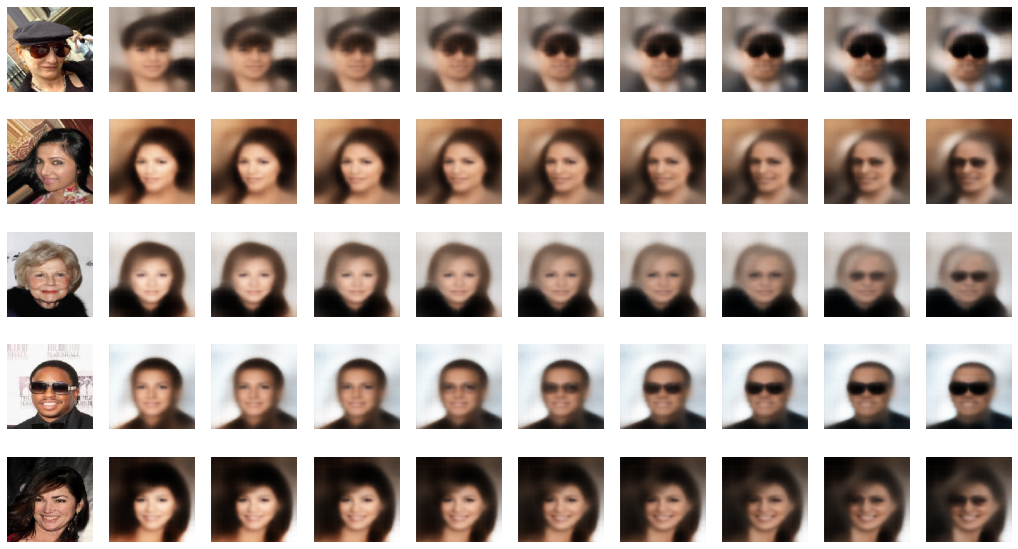

In [16]:
# print('Attractive Vector')
# add_vector_to_images(attractive_vec)

# print('Mouth Open Vector')
# add_vector_to_images(mouth_open_vec)

# print('Smiling Vector')
# add_vector_to_images(smiling_vec)

# print('Lipstick Vector')
# add_vector_to_images(lipstick_vec)

# print('Young Vector')
# add_vector_to_images(young_vec)

# print('Male Vector')
# add_vector_to_images(male_vec)

print('Eyeglasses Vector')
add_vector_to_images(eyeglasses_vec)

# print('Blond Vector')
# add_vector_to_images(blonde_vec)

In [17]:

def morph_faces(start_image_file, end_image_file):

    factors = np.arange(0,1,0.1)

    att_specific = att[att['image_id'].isin([start_image_file, end_image_file])]
    att_specific = att_specific.reset_index()
    data_flow_label = imageLoader.build(att_specific, 2)

    example_batch = next(data_flow_label)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    z_points = vae.encoder.predict(example_images)


    fig = plt.figure(figsize=(18, 8))

    counter = 1

    img = example_images[0].squeeze()
    sub = fig.add_subplot(1, len(factors)+2, counter)
    sub.axis('off')        
    sub.imshow(img)

    counter+=1


    for factor in factors:

        changed_z_point = z_points[0] * (1-factor) + z_points[1]  * factor
        changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

        img = changed_image.squeeze()
        sub = fig.add_subplot(1, len(factors)+2, counter)
        sub.axis('off')
        sub.imshow(img)

        counter += 1

    img = example_images[1].squeeze()
    sub = fig.add_subplot(1, len(factors)+2, counter)
    sub.axis('off')        
    sub.imshow(img)


    plt.show()

Found 2 validated image filenames.


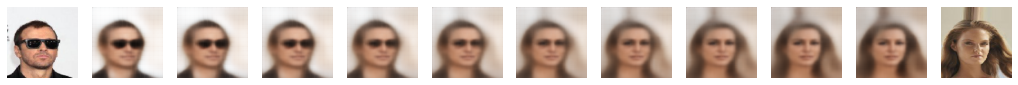

In [18]:
start_image_file = '000238.jpg' 
end_image_file = '000193.jpg' #glasses

morph_faces(start_image_file, end_image_file)

Found 2 validated image filenames.


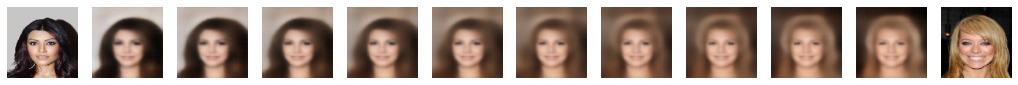

In [19]:
start_image_file = '000112.jpg'
end_image_file = '000258.jpg'

morph_faces(start_image_file, end_image_file)

Found 2 validated image filenames.


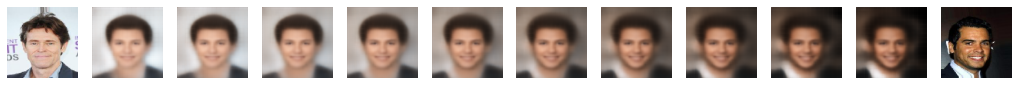

In [20]:
start_image_file = '000230.jpg'
end_image_file = '000712.jpg'

morph_faces(start_image_file, end_image_file)